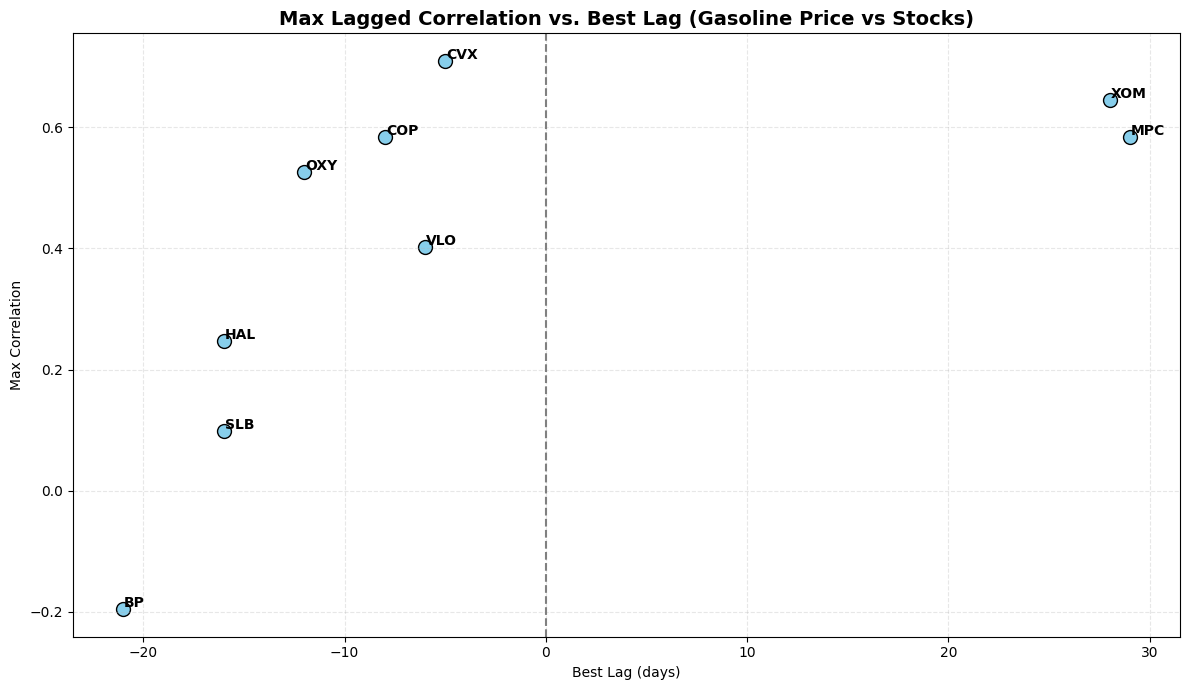

In [ ]:
!pip install adjustText

import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text


path = "/content/drive/My Drive/datathon 2025/max_lagged_correlation_summary.csv"
df = pd.read_csv(path)

plt.figure(figsize=(12, 7))
plt.scatter(df['BestLag'], df['MaxCorrelation'], s=100, color='skyblue', edgecolor='black')

texts = []
for _, row in df.iterrows():
    texts.append(plt.text(row['BestLag'], row['MaxCorrelation'], row['Ticker'], fontsize=10, weight='bold'))

plt.axvline(0, color='gray', linestyle='--')
plt.title("Max Lagged Correlation vs. Best Lag (Gasoline Price vs Stocks)", fontsize=14, weight='bold')
plt.xlabel("Best Lag (days)")
plt.ylabel("Max Correlation")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()


adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'))

plt.show()




In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/datathon 2025/max_lagged_correlation_summary.csv")

# 2. Classify lag type
def classify_lag(lag):
    if lag > 5:
        return "Lead"
    elif lag < -5:
        return "Lag"
    else:
        return "Synchronous"

df["LagCategory"] = df["BestLag"].apply(classify_lag)

# 3. Calculate Synchronization Score
df["SyncScore"] = df["MaxCorrelation"] / (abs(df["BestLag"]) + 1)

# 4. Sort by SyncScore
df = df.sort_values(by="SyncScore", ascending=False)

# 5. Select key columns
result = df[["Ticker", "MaxCorrelation", "BestLag", "LagCategory", "SyncScore"]]

# 6. Display the top rows of the table
print(result.head(10))

# 7. Optional: save as CSV
# result.to_csv("/content/drive/My Drive/datathon 2025/syncscore_ranking.csv", index=False)


Mounted at /content/drive
  Ticker  MaxCorrelation  BestLag  LagCategory  SyncScore
0    CVX        0.709683       -5  Synchronous   0.118280
3    COP        0.583139       -8          Lag   0.064793
5    VLO        0.402640       -6          Lag   0.057520
4    OXY        0.526848      -12          Lag   0.040527
1    XOM        0.645006       28         Lead   0.022242
2    MPC        0.584227       29         Lead   0.019474
6    HAL        0.247012      -16          Lag   0.014530
7    SLB        0.099264      -16          Lag   0.005839
8     BP       -0.195614      -21          Lag  -0.008892
